In [16]:
#Transformacion de variables para conseguir una relacion no lineal
import pandas
import numpy

In [3]:
data_auto=pandas.read_csv(r"D:\Estudiar\Python\MLData\auto\auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
data_auto.shape

(406, 9)

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

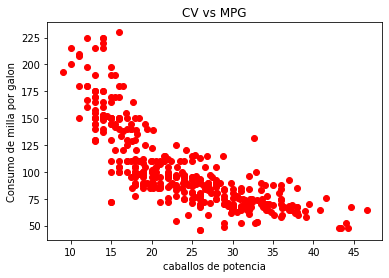

In [9]:
%matplotlib inline
data_auto["mpg"]=data_auto["mpg"].dropna()
data_auto["horsepower"]=data_auto["horsepower"].dropna()
plt.plot(data_auto["mpg"],data_auto["horsepower"],"ro")
plt.xlabel("caballos de potencia")
plt.ylabel("Consumo de milla por galon")
plt.title("CV vs MPG")

In [10]:
#Regresion lineal
from sklearn.linear_model import LinearRegression

In [19]:
x=data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
y=data_auto["mpg"].fillna(data_auto["mpg"].mean())
x_data=x[:,numpy.newaxis]

In [18]:
lm=LinearRegression()
lm.fit(x[:,numpy.newaxis],y)


LinearRegression()

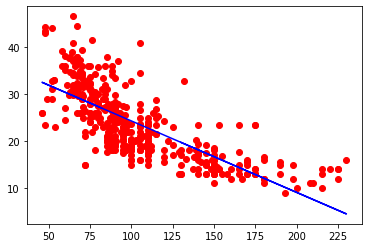

In [20]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x,lm.predict(x_data),color="blue")

In [21]:
lm.score(x_data,y)

0.5746533406450252

In [26]:
SSD=numpy.sum((y-lm.predict(x_data))**2)
RSE=numpy.sqrt(SSD/(len(x_data)-1))
y_mean=numpy.mean(y)
error=RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.751960060918, 5.046879480825511, 23.514572864321607, 21.462773361633474)

In [28]:
#modelo de regresion cuadratico
#horsepower**2
x_data=x**2
x_data=x_data[:,numpy.newaxis]

In [30]:
lm=LinearRegression()
lm.fit(x_data,y)

<bound method RegressorMixin.score of LinearRegression()>


In [31]:
SSD=numpy.sum((y-lm.predict(x_data))**2)
RSE=numpy.sqrt(SSD/(len(x_data)-1))
y_mean=numpy.mean(y)
error=RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

In [32]:
#modelo regresion lineal y cuadratico
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [33]:
poly=PolynomialFeatures(degree=2)

In [34]:
x_data=poly
x_data=poly.fit_transform(x[:,numpy.newaxis])

In [35]:
lm=linear_model.LinearRegression()
lm.fit(x_data,y)

LinearRegression()

In [37]:
lm.score(x_data,y)

0.6439066584257469

In [38]:
SSD=numpy.sum((y-lm.predict(x_data))**2)
RSE=numpy.sqrt(SSD/(len(x_data)-1))
y_mean=numpy.mean(y)
error=RSE/y_mean
SSD, RSE, y_mean, error*100

(8636.180643524502, 4.61778115803654, 23.514572864321607, 19.6379546619069)

In [39]:
lm.intercept_, lm.coef_

(55.026192447081144, array([ 0.        , -0.43404318,  0.00112615]))

In [40]:
#mpg=55.026192447081144-0.43404318*hp+0.00112615*hp**""

In [55]:
for d in range(2,6):
    poly=PolynomialFeatures(degree=d)
    x_data=poly
    x_data=poly.fit_transform(x[:,numpy.newaxis])
    lm=linear_model.LinearRegression()
    lm.fit(x_data,y)
    print(lm.score(x_data,y))
    RegressionValidation(lm,x_data,y)

0.6439066584257469
SSD: 8636.180643524502 RSE: 4.61778115803654 y_mean: 23.514572864321607 error: 19.6379546619069
0.6444678885560744
SSD: 8622.56936742855 RSE: 4.614140736300908 y_mean: 23.514572864321607 error: 19.622473106036686
0.6467674189704502
SSD: 8566.799832491353 RSE: 4.5991947315797574 y_mean: 23.514572864321607 error: 19.55891250126879
0.6547512491363356
SSD: 8373.171388794579 RSE: 4.546921734127706 y_mean: 23.514572864321607 error: 19.336612067602974


In [54]:
def RegressionValidation(lm,x_data,y):
    SSD=numpy.sum((y-lm.predict(x_data))**2)
    RSE=numpy.sqrt(SSD/(len(x_data)-1))
    y_mean=numpy.mean(y)
    error=RSE/y_mean
    print("SSD: "+str(SSD)+" RSE: "+str(RSE)+" y_mean: "+str(y_mean)+" error: "+str(error*100))

In [56]:
#El problema de los outliers
#Valores fuera de rango

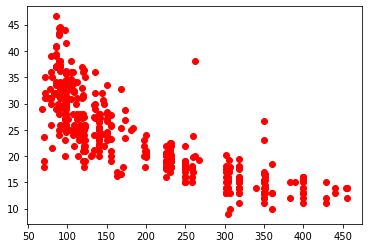

In [58]:
plt.plot(data_auto["displacement"],data_auto["mpg"],"ro")

In [83]:
x=data_auto["displacement"].fillna(data_auto["displacement"].mean())
x_auto=x[:,numpy.newaxis]
y=data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm=LinearRegression()
lm.fit(x_auto,y)

LinearRegression()

In [84]:
lm.score(x_auto,y)

0.6261049762826918

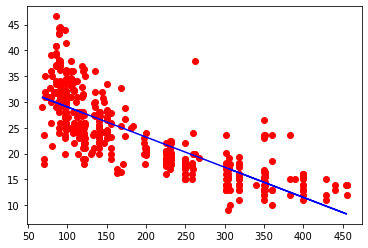

In [67]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x,lm.predict(x_auto),color="blue")

In [69]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [76]:
data_auto[(data_auto["displacement"]>290)&(data_auto["mpg"]>19)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
257,19.4,8,318.0,140.0,3735,13.2,78,1,dodge diplomat
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
269,19.2,8,305.0,145.0,3425,13.2,78,1,chevrolet monte carlo landau
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [79]:
data_auto_clean=data_auto.drop([395,257,258,269,385,372])

In [86]:
x=data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
x_auto=x[:,numpy.newaxis]
y=data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm=LinearRegression()
lm.fit(x_auto,y)

LinearRegression()

In [87]:
lm.score(x_auto,y)

0.642831092429718

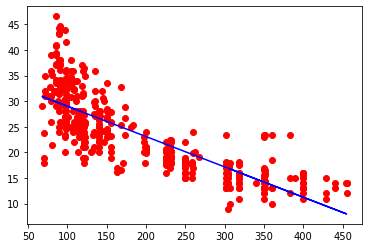

In [89]:
%matplotlib inline
plt.plot(x_auto,y,"ro")
plt.plot(x_auto,lm.predict(x_auto),color="blue")